## Import Library and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

## Data Overview

In [ ]:
# Data Columns
# MarketID: unique identifier for market
# MarketSize: size of market area by sales
# LocationID: unique identifier for store location
# AgeOfStore: age of store in years
# Promotion: one of three promotions that were tested
# week: one of four weeks when the promotions were run
# SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
# Get categorical variable distribution
col_type = df.dtypes.index.tolist()
var_cat = col_type[1:6]

for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(df[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - MarketSize:
Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64
-------------------------------------------------------

1 - LocationID:
920    4
302    4
308    4
307    4
306    4
      ..
702    4
703    4
704    4
705    4
1      4
Name: LocationID, Length: 137, dtype: int64
-------------------------------------------------------

2 - AgeOfStore:
1     80
4     44
5     44
7     40
8     40
6     36
3     32
9     28
12    24
10    24
2     20
13    20
19    20
11    16
14    12
22    12
24    12
15     8
18     8
23     8
27     4
17     4
20     4
25     4
28     4
Name: AgeOfStore, dtype: int64
-------------------------------------------------------

3 - Promotion:
3    188
2    188
1    172
Name: Promotion, dtype: int64
-------------------------------------------------------

4 - week:
4    137
3    137
2    137
1    137
Name: week, dtype: int64
-------------------------------------------------------



In [6]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

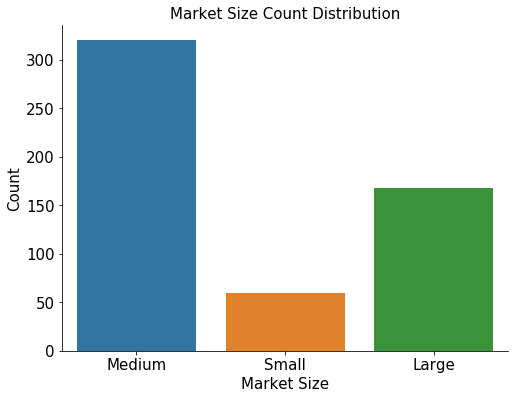

In [7]:
# creates a figure (fig) and a set of subplots (ax1)
fig, ax1 = plt.subplots(figsize=(8,6))

#  creates a count plot using the seaborn library. The ax=ax1 parameter specifies that the plot should be drawn on the axes ax1
sns.countplot(x = 'MarketSize', data = df, ax = ax1)

ax1.set_xlabel('Market Size', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Market Size Count Distribution', fontsize=15)

# sets the tick parameters for the axes, adjusting the font size of the tick labels.
ax1.tick_params(labelsize=15)

#removes the spines (the top and right axes lines) from the plot for aesthetic purposes.
sns.despine()

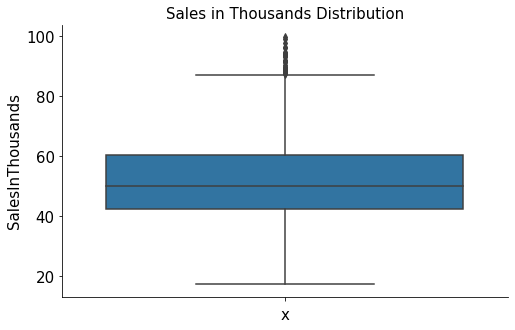

In [8]:
fig, ax1= plt.subplots(figsize=(8,5))
sns.boxplot(y='SalesInThousands', data=df, ax=ax1)
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('SalesInThousands', fontsize=15)
ax1.set_title('Sales in Thousands Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.despine()

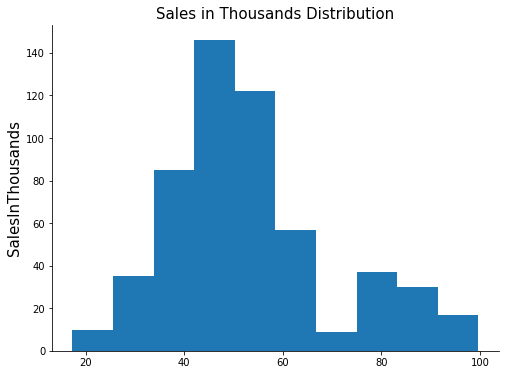

In [9]:
hist = df['SalesInThousands'].hist(bins=10, figsize=(8, 6),grid=False,)
hist.set_xlabel('', fontsize=15)
hist.set_ylabel('SalesInThousands', fontsize=15)
hist.set_title('Sales in Thousands Distribution', fontsize=15)
sns.despine()

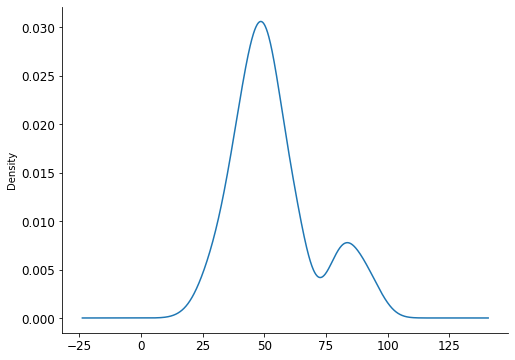

In [10]:
plt = df['SalesInThousands'].plot(kind= 'density', subplots=True,  sharex=False, 
                     sharey=False,fontsize=12, figsize=(8,6))
sns.despine()

## Singe Linear Regression

In [12]:
df['Promotion']=df['Promotion'].astype(str)
x1 = df['Promotion']
x1_dummy = pd.get_dummies(x1)

x = sm.add_constant(x1_dummy)
y = df['SalesInThousands']
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\jinwen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jinwen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jinwen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.95
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           6.77e-10
Time:                        17:00:55   Log-Likelihood:                -2300.5
No. Observations:                 548   AIC:                             4607.
Df Residuals:                     545   BIC:                             4620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1982      0.518     77.631      0.000      39.181      41.215
1             17.9008      1.013     17.671      0.000      15.911      19.891
2              7.1312      0.981      7.272      0.000       5.205       9.057
3             15.1662      0.981     15.466      0.000      13.240      17.093
==============================================================================
Omnibus:                       52.072   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.242
Skew:                           0.842   Prob(JB):                     6.81e-15
Kurtosis:                       3.137   Cond. No.                     1.34e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### as P-values are all smaller than 0.5, coefficiencts of dummy variables are statistically significant where the relationshiop bewtween SalesInThousands and Promotion method are different from 0

In [74]:
## interpretation of coefficient

## Multiple Linear Regression

In [13]:
x2 = df['MarketSize']
x2_dummy = pd.get_dummies(x2)

x = pd.concat([x1_dummy, x2_dummy], axis=1)
y = df['SalesInThousands']
regr = linear_model.LinearRegression()
regr.fit(x, y)

y_pred= regr.predict(x)  

reg_model_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,33.73,47.50
1,35.67,47.50
2,29.03,47.50
3,39.25,47.50
4,27.81,37.00
...,...,...
543,64.34,74.25
544,50.20,63.50
545,45.75,63.50
546,44.29,63.50


In [15]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     188.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.74e-101
Time:                        17:01:56   Log-Likelihood:                -2083.2
No. Observations:                 548   AIC:                             4176.
Df Residuals:                     543   BIC:                             4198.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             32.4944      0.734     44.268      0.000      31.052      33.936
2             21.7270      0.718     30.240      0.000      20.316      23.138
3             31.4787      0.710     44.348      0.000      30.084      32.873
Large         42.0144      0.747     56.231      0.000      40.547      43.482
Medium        15.4931      0.576     26.877      0.000      14.361      16.625
Small         28.1925      1.186     23.781      0.000      25.864      30.521
==============================================================================
Omnibus:                       17.447   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.881
Skew:                          -0.072   Prob(JB):                       0.0118
Kurtosis:                       2.393   Cond. No.                     7.42e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = np.sqrt(mean_squared_error(y, y_pred))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 8.909160583941604
Mean Square Error: 117.6775102189781
Root Mean Square Error: 10.847926540080278
